In [31]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Analisi diffusione COVID-19 nel mondo.
# Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; 
# a tal fine, richiede di utilizzare il dataset, curato da Our World in Data.

In [32]:
import numpy as np
import pandas as pd
import os

# Leggo il file CSV in un DataFrame
df = pd.read_csv('owid-covid-data.csv')

In [69]:
# Le informazioni del dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402717 entries, 0 to 402716
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402717 non-null  object 
 1   continent                                   383454 non-null  object 
 2   location                                    402717 non-null  object 
 3   date                                        402717 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

In [70]:
# Dimensioni del DataFrame
print(df.shape)

(402717, 67)


In [71]:
# Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
# si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

df = df.dropna(subset=['continent'])

In [ ]:
'''Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici:
valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)'''

In [76]:
# si raggruppano i dati per 'Continent' e sommo i casi totali 

totale_casi_continent = df.groupby('continent')['total_cases'].sum()
print(totale_casi_continent)

continent
Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10
Name: total_cases, dtype: float64


In [38]:
# Specifico i nomi dei due continenti da confrontare
continente1 = 'North America'
continente2 = 'Africa'

In [84]:
# Filtro i dati per i 2 continenti specificati
dati_continente1 = df[df['continent'] == continente1]['total_cases']
dati_continente2 = df[df['continent'] == continente2]['total_cases']


In [86]:
# Si definiscono i descrittori statistici per ciascun continente
max_c1 = dati_continente1.max()
media_c1 = dati_continente1.mean()
max_c2 = dati_continente2.max()
media_c2 = dati_continente2.mean()

# Totale dei casi nel mondo (inclusi i casi senza indicazione di continente)
totale_casi_mondiali = df['total_cases'].sum()

# Si calcola il totale dei casi per ciascun continente
totale_casi_continente1 = dati_continente1.sum()
totale_casi_continente2 = dati_continente2.sum()

# Calcola la percentuale di casi per ciascun continente rispetto al totale mondiale
percentuale_continente1 = (totale_casi_continente1 / totale_casi_mondiali) * 100
percentuale_continente2 = (totale_casi_continente2 / totale_casi_mondiali) * 100

# Mostra i risultati del continente 1
print(f"Descrittori statistici primo continente: {continente1}")
print(f"Valore massimo: {max_c1}")
print(f"Media: {media_c1}")
print(f"Percentuale rispetto al totale mondiale: {percentuale_continente1:.2f}%")

# Mostra i risultati del continente 2
print(f"\nDescrittori statistici secondo continente: {continente2}")
print(f"Valore massimo: {max_c2}")
print(f"Media: {media_c2}")
print(f"Percentuale rispetto al totale mondiale: {percentuale_continente2:.2f}%")

Descrittori statistici primo continente: North America
Valore massimo: 103436829.0
Media: 1879169.2975518494
Percentuale rispetto al totale mondiale: 17.91%

Descrittori statistici secondo continente: Africa
Valore massimo: 4072697.0
Media: 158524.77575418603
Percentuale rispetto al totale mondiale: 2.07%


In [92]:
'''Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
e commentare se ci sono similarità con l'andamento del numero dei casi totali;'''

import matplotlib.pyplot as plt

#  trasformiamo la colonna 'date' in tipo 'datetime'
df['date'] = pd.to_datetime(df['date'])
df.date

0        2020-01-05
1        2020-01-06
2        2020-01-07
3        2020-01-08
4        2020-01-09
            ...    
402712   2024-05-15
402713   2024-05-16
402714   2024-05-17
402715   2024-05-18
402716   2024-05-19
Name: date, Length: 402717, dtype: datetime64[ns]

C:\Users\micla\AppData\Local\Temp\ipykernel_25828\367795012.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022['date'] = pd.to_datetime(dati_italia_2022['date'])


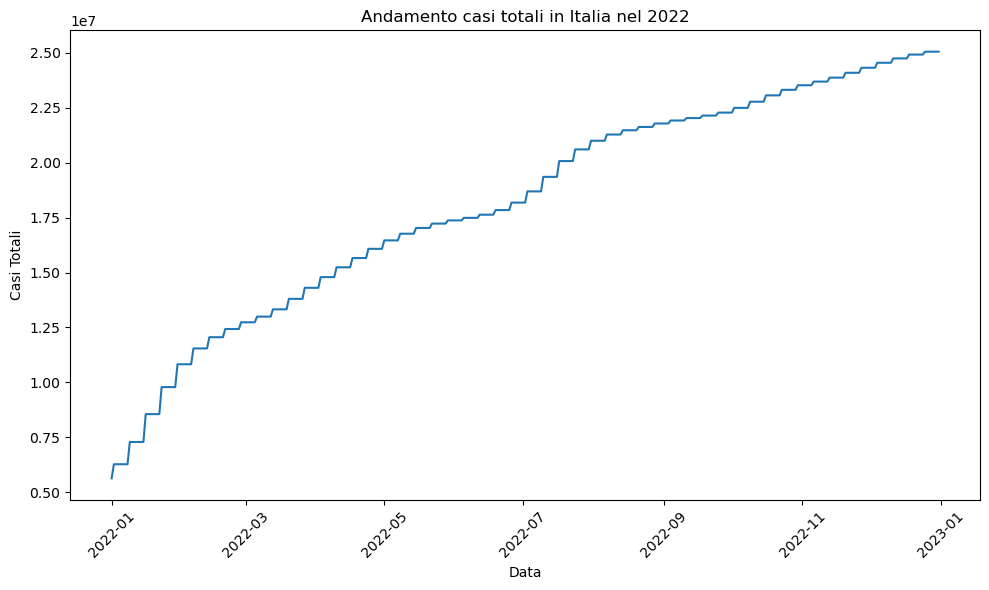

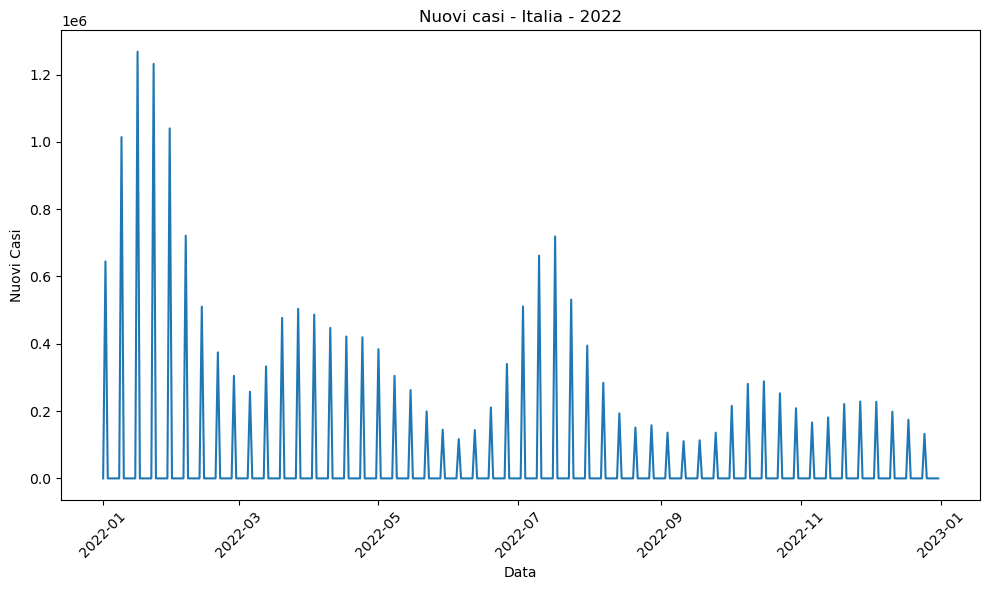

C:\Users\micla\AppData\Local\Temp\ipykernel_25828\367795012.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022['cumulative_new_cases'] = dati_italia_2022['new_cases'].cumsum()


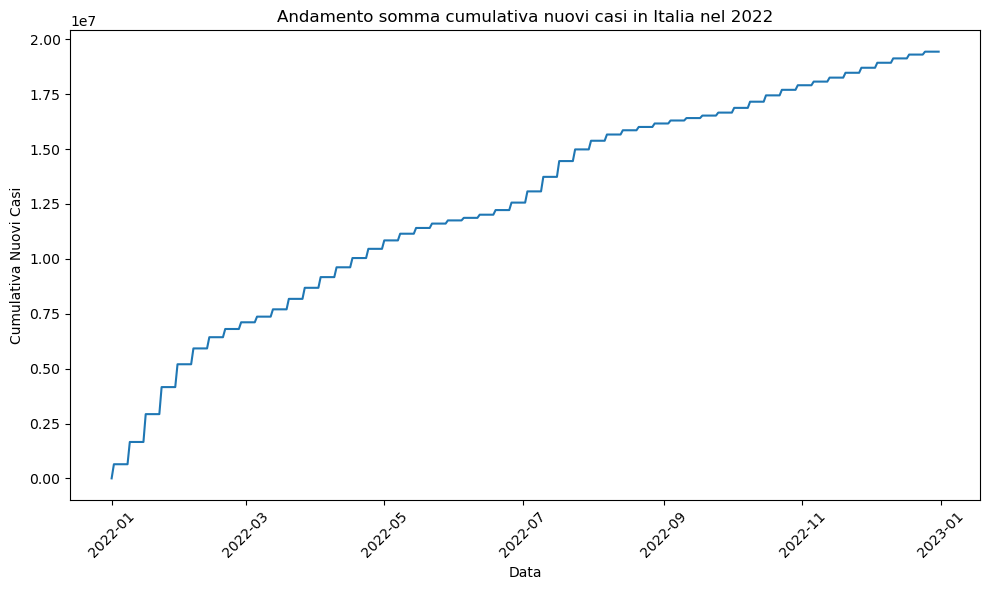

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggere il file CSV
df = pd.read_csv('owid-covid-data.csv') 

# Verifico che le colonne esistano
required_columns = ['location', 'date', 'total_cases', 'new_cases']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"La colonna '{column}' non esiste nel DataFrame")

# Setto la colonna 'date' di tipo stringa gestendo i valori NaN
df['date'] = df['date'].astype(str)

# Filtro i dati per l'Italia nel 2022
dati_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].str.startswith('2022'))]

# Verificare se ci sono dati dopo il filtro
if dati_italia_2022.empty:
    print("Nessun dato trovato per l'Italia nel 2022.")
else:
    # Convertire la colonna 'date' in formato datetime
    dati_italia_2022['date'] = pd.to_datetime(dati_italia_2022['date'])

    # Evoluzione dei casi totali rispetto alla data
    plt.figure(figsize=(10, 6))
    plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'])
    plt.title('Andamento casi totali in Italia nel 2022')
    plt.xlabel('Data')
    plt.ylabel('Casi Totali')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Numero di nuovi casi rispetto alla data
    plt.figure(figsize=(10, 6))
    plt.plot(dati_italia_2022['date'], dati_italia_2022['new_cases'])
    plt.title('Nuovi casi - Italia - 2022')
    plt.xlabel('Data')
    plt.ylabel('Nuovi Casi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Somma cumulativa nuovi casi del 2022
    dati_italia_2022['cumulative_new_cases'] = dati_italia_2022['new_cases'].cumsum()
    plt.figure(figsize=(10, 6))
    plt.plot(dati_italia_2022['date'], dati_italia_2022['cumulative_new_cases'])
    plt.title('Andamento somma cumulativa nuovi casi in Italia nel 2022')
    plt.xlabel('Data')
    plt.ylabel('Cumulativa Nuovi Casi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

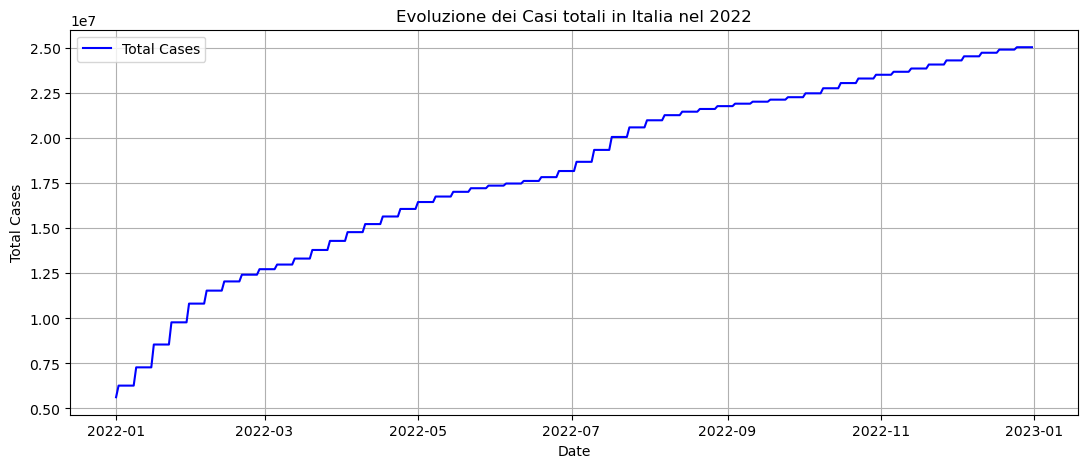

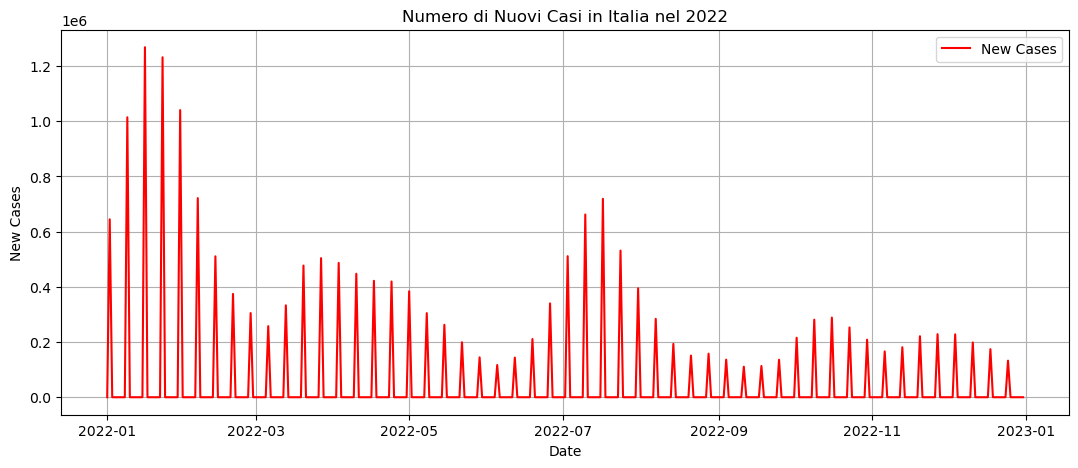

In [57]:
#Ordina i dati per data
dati_italia_2022 = dati_italia_2022.sort_values(by='date')

# Grafico dell'evoluzione dei casi totali rispetto alla data
plt.figure(figsize=(13, 5))
plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'], label='Total Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Evoluzione dei Casi totali in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

# Nuovi casi giornalieri
dati_italia_2022['new_cases'] = dati_italia_2022['total_cases'].diff().fillna(0)

# Nuovi casi rispetto alla data
plt.figure(figsize=(13, 5))
plt.plot(dati_italia_2022['date'], dati_italia_2022['new_cases'], label='New Cases', color='red')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Numero di Nuovi Casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\micla\AppData\Local\Temp\ipykernel_25828\3082717591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022['somma_cumulativa_nuovi_casi'] = dati_italia_2022['new_cases'].cumsum()


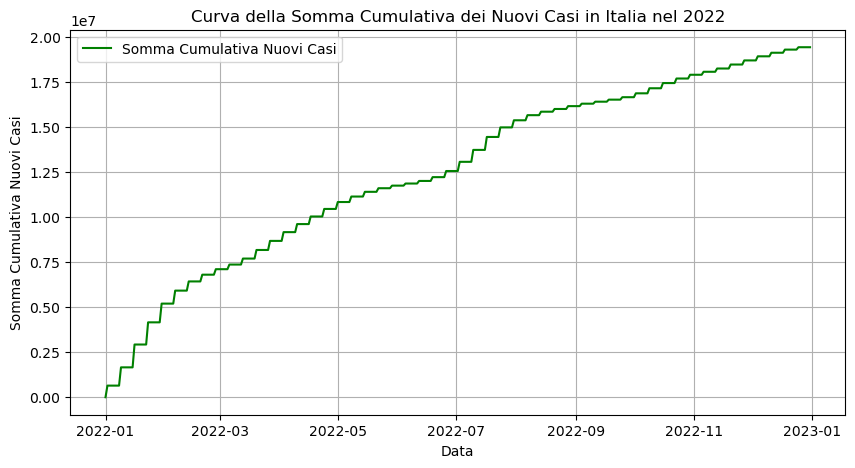

Commento:
L'andamento della somma cumulativa dei nuovi casi mostra una crescita continua e progressiva
che dovrebbe rispecchiare l'andamento dei casi totali. 
Entrambi i grafici mostrano una crescita nel tempo, 
ma mentre la somma cumulativa dei nuovi casi evidenzia incrementi giornalieri, i casi totali mostrano l'accumulo complessivo. 
Idealmente, la somma cumulativa dei nuovi casi dovrebbe allinearsi con l'andamento dei casi totali, 
con eventuali differenze dovute a variazioni nei dati o discrepanze nella registrazione.


In [93]:
# Somma cumulativa dei nuovi casi
dati_italia_2022['somma_cumulativa_nuovi_casi'] = dati_italia_2022['new_cases'].cumsum()

# Grafico dell'andamento della somma cumulativa dei nuovi casi
plt.figure(figsize=(10, 5))
plt.plot(dati_italia_2022['date'], dati_italia_2022['somma_cumulativa_nuovi_casi'], label='Somma Cumulativa Nuovi Casi', color='green')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.title('Curva della Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

# Commento sulle similarità
print("Commento:")
print("L'andamento della somma cumulativa dei nuovi casi mostra una crescita continua e progressiva")
print("che dovrebbe rispecchiare l'andamento dei casi totali. \nEntrambi i grafici mostrano una crescita nel tempo, \nma mentre la somma cumulativa dei nuovi casi evidenzia incrementi giornalieri, i casi totali mostrano l'accumulo complessivo. \nIdealmente, la somma cumulativa dei nuovi casi dovrebbe allinearsi con l'andamento dei casi totali, \ncon eventuali differenze dovute a variazioni nei dati o discrepanze nella registrazione.")


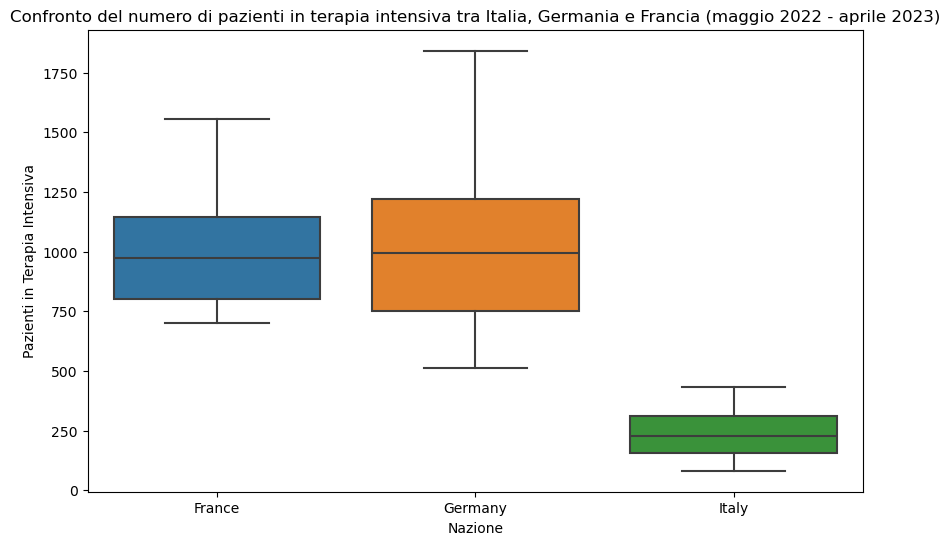

In [60]:
# Filtrare i dati da maggio 2022 ad aprile 2023
df_icus = df[(df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30') & 
             (df['location'].isin(['Italy', 'Germany', 'France']))]

# Boxplot del numero di pazienti in terapia intensiva
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_icus)
plt.title('Confronto del numero di pazienti in terapia intensiva tra Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

In [99]:

# Commento sulle differenze osservate"
''' 
Il grafico mostra la distribuzione del numero di pazienti in terapia intensiva (ICU) in Italia, Germania e Francia da maggio 2022 ad aprile 2023.
Si appura che in Germania la mancanza di dati per quanto riguarda il numero di casi in terapia intensia era,
che non deve pregiudicare la struttura del DF altrimenti la perdita di dati diventa colossale.
Un possibile consiglio è quello di integrare un Data set esterno, scelta da valutare in quanto potrebbe presentarsi la difficoltà di gestire i dati non combacianti.  '''

SyntaxError: unterminated string literal (detected at line 8) (4379835.py, line 8)